1. Explain the difference between AWS Regions, Availability Zones, and Edge Locations. Why is this important for data analysis and latency-sensitive applications?

-> AWS Regions-

a. Definition: A Region is a geographically separate area (e.g., us-east-1 in Virginia, ap-south-1 in Mumbai).

b. What it contains: Each Region has multiple data centres grouped into Availability Zones (AZs).

c. Why it matters: We choose a Region based on proximity to users, compliance requirements, and costs.

Availability Zones (AZs)-

a. Definition: An AZ is a physically isolated data center (or group of data centres) within a Region, each with independent power, cooling, and networking.

b. Purpose: AZs are interconnected with low-latency, high-bandwidth links, which allows us to build fault-tolerant and highly available systems by deploying across multiple AZs.

c. Why it matters: If one AZ goes down, applications can still run from another AZ within the same Region.

Edge Locations-

a. Definition: These are data centres located worldwide used by Amazon CloudFront (CDN) and AWS edge services.

b. Purpose: They cache frequently accessed content and route traffic closer to end users.

c. Why it matters: Edge locations reduce latency and speed up content delivery for users far from the chosen AWS Region.
This Is Important for Data Analysis & Latency-Sensitive Applications because-

Data Analysis-

a. Running workloads in the correct Region ensures data stays within regulatory boundaries (e.g., GDPR, HIPAA).

b. Spreading across AZs ensures reliability of analytics pipelines (no downtime if a data center fails).

Latency-Sensitive Applications (e.g., real-time dashboards, streaming analytics)-

a. Choosing a Region close to our users reduces round-trip times.

b. Using multiple AZs prevents outages from disrupting services.

c. Leveraging Edge Locations (via CloudFront or AWS Global Accelerator) ensures faster access to dashboards, APIs, or streaming content, improving user experience.

2. Using the AWS CLI, list all available AWS regions. Share the command used and the output.

-> Command- aws ec2 describe-regions --all-regions --query "Regions[].RegionName" --output json

Output-

[

"ap-south-2",

"ap-south-1",

"eu-south-1",

"eu-south-2",

"me-central-1",

"il-central-1",

"ca-central-1",

"ap-east-2",

"mx-central-1",

"eu-central-1",

"eu-central-2",

"us-west-1",

"us-west-2",

"af-south-1",

"eu-north-1",

"eu-west-3",

"eu-west-2",

"eu-west-1",

"ap-northeast-3",

"ap-northeast-2",

"me-south-1",

"ap-northeast-1",

"sa-east-1",

"ap-east-1",

"ca-west-1",

"ap-southeast-1",

"ap-southeast-2",

"ap-southeast-3",

"ap-southeast-4",

"us-east-1",

"ap-southeast-5",

"us-east-2",

"ap-southeast-6",

"ap-southeast-7"

]

3. Create a new IAM user with least privilege access to Amazon S3. Share your attached policies (JSON or screenshot).

->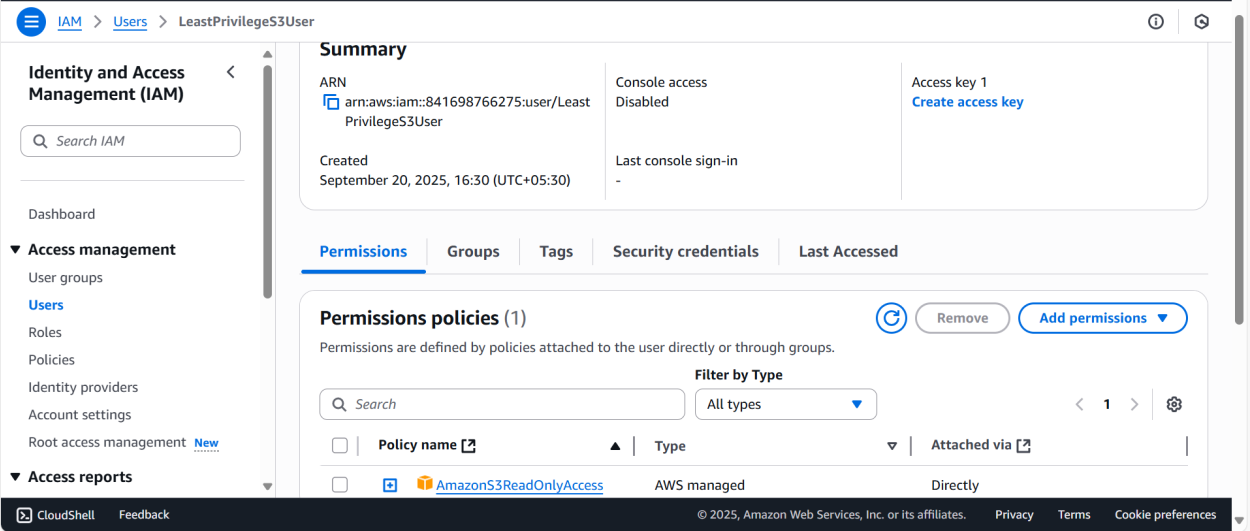

4. Compare different Amazon S3 storage (Standard, Intelligent-Tiering, Glacier). When should each be used in data analytics workflows?

-> a. S3 Standard-

What it is:

a. Default storage class, designed for frequently accessed data.

b. High durability (99.999999999%), high availability, and low latency.

When to use in data analytics:

a. Active datasets used regularly for analytics (e.g., logs, CSV/Parquet files, training data).

b. When you need fast query response times (Athena, Redshift Spectrum, EMR, Spark).

Example: Storing raw clickstream logs that analysts query daily.

b. S3 Intelligent-Tiering-

What it is:

a. Automatically moves objects between frequent access and infrequent access tiers based on usage patterns.

b. No retrieval fees; small monitoring fee per object.

When to use in data analytics:

a. Unpredictable access patterns where some data is queried heavily for a while, then rarely.

b. Helps reduce costs without sacrificing performance.

Example: A large dataset of IoT sensor data where analysts may query recent weeks frequently but only occasionally look at older records.

c. S3 Glacier (and Glacier Deep Archive)

What it is:

a. Archival storage with very low cost, but higher retrieval times (minutes to hours).

b. Not meant for active querying.

When to use in data analytics:

a. For long-term retention of historical datasets that are rarely accessed, but may be needed for compliance or occasional analysis.

b. Best for cold data that you don’t want to delete but don’t need immediately.

Example: Storing 5 years of raw financial transaction logs. Analysts mostly use recent data, but occasionally pull older data for trend analysis or audits.

They should each be used in data analytics workflows when:

a. Ingestion & Processing: Store raw incoming data in S3 Standard for quick access and transformation.

b. Exploratory Analysis: Move less-frequently accessed historical data into S3 Intelligent-Tiering to cut costs but still allow fast queries.

c. Archival & Compliance: Transition very old datasets (years old) into S3 Glacier for compliance and long-term storage.

5. Create an S3 bucket and upload a sample dataset (CSV or JSON). Enable versioning and show at least two versions of one file.

-> 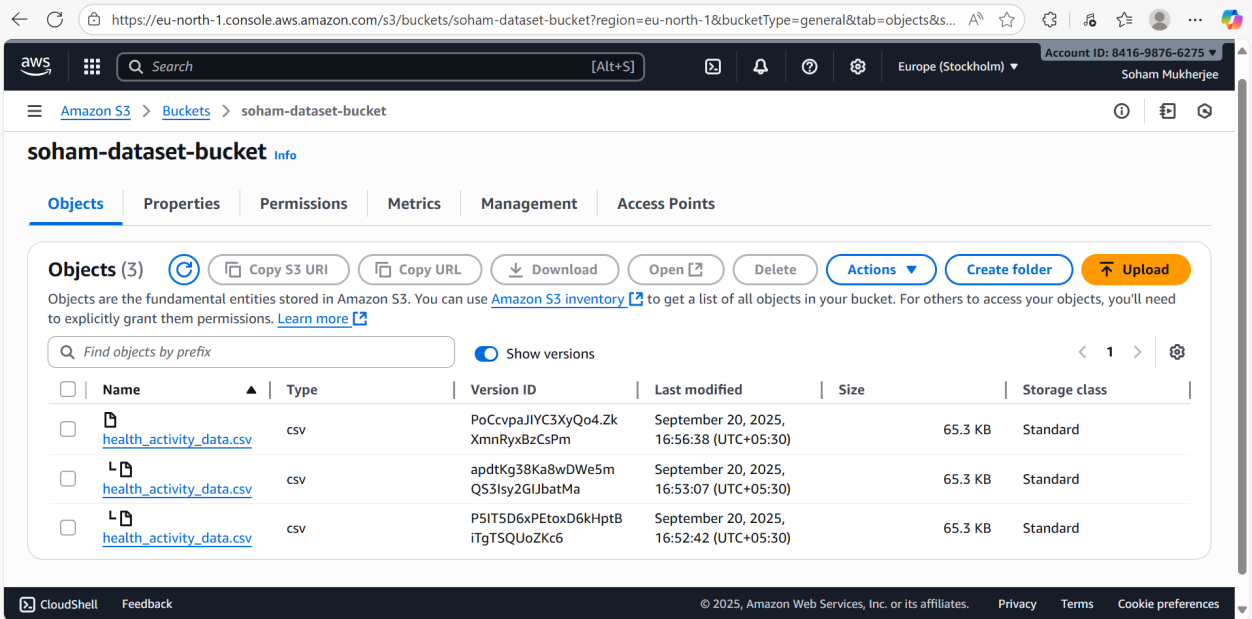

6. Write and apply a lifecycle policy to move files to Glacier after 30 days and delete them after 90. Share the policy JSON or Screenshot.

-> 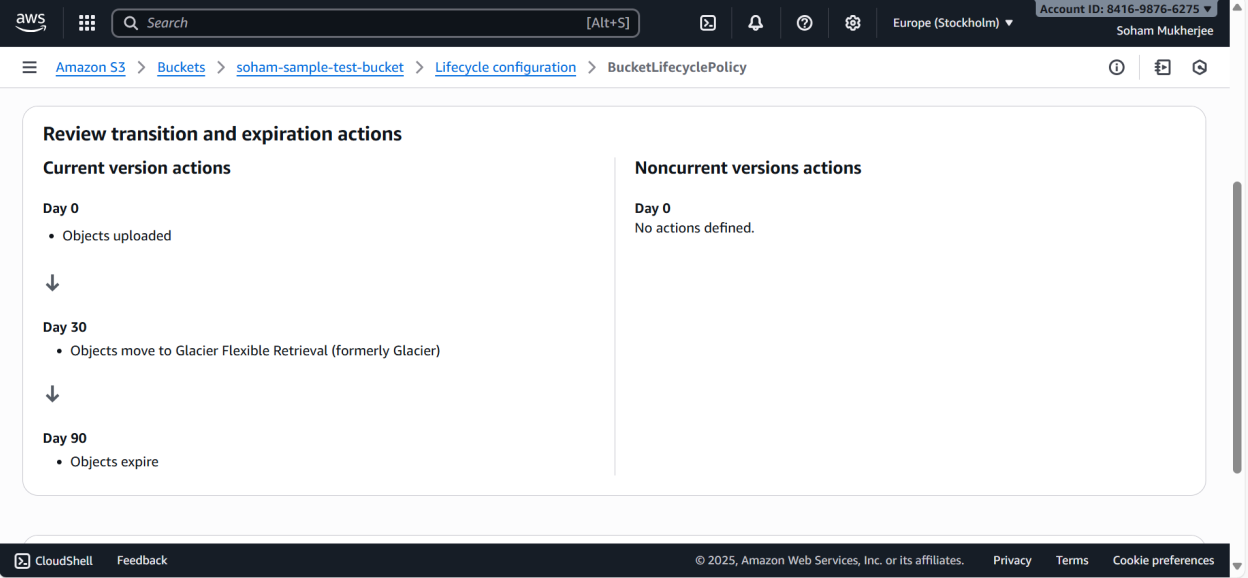

7. Compare RDS, DynamoDB, and Redshift for use in different stages of a data pipeline. Give one use case for each.

-> Amazon RDS (Relational Database Service)-

a. Type: Relational SQL database (structured tables, relationships)

b. Pipeline Stage: Data ingestion / operational layer

c. Characteristics: ACID-compliant, strong consistency, moderate throughput

d. Use Case: Storing daily sales transactions from an e-commerce platform before transformation for analytics

Amazon DynamoDB-

a. Type: NoSQL key-value and document database (schema-less)

b. Pipeline Stage: Real-time ingestion / high-velocity data capture

c. Characteristics: Low-latency, automatically scalable, eventual consistency (option for strong consistency)

d. Use Case: Collecting website clickstream events in real time for immediate processing

Amazon Redshift-

a. Type: Columnar data warehouse for analytical queries

b. Pipeline Stage: Analytics / BI layer

c. Characteristics: Optimized for complex queries and aggregations on large datasets, petabyte-scale

d. Use Case: Running dashboards and reports to analyse historical sales and marketing data

8. Create a DynamoDB table and insert 3 records manually. Then write a Lambda function that adds records when triggered by S3 uploads.

->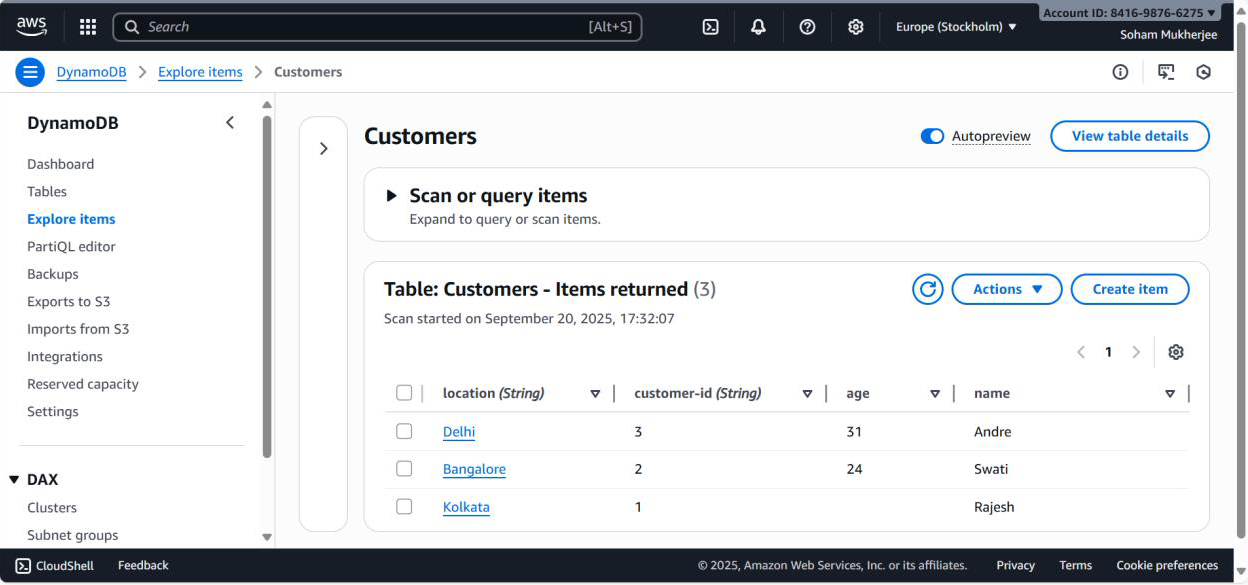

Lambda Function (AddCustomerOnS3Upload)-

import json

import boto3

from datetime import datetime

import os

dynamodb = boto3.resource('dynamodb')

table = dynamodb.Table('Customers')

def lambda_handler(event, context):

    s3 = boto3.client('s3')

    for record in event['Records']:

        bucket = record['s3']['bucket']['name']

        key = record['s3']['object']['key']

        response = s3.get_object(Bucket=bucket, Key=key)

        data = json.loads(response['Body'].read().decode('utf-8'))

        for customer in data:

            if 'location' in customer and 'customer-id' in customer:

                item = {

                'location': customer['location'],

                'customer-id': customer['customer-id'],

                'name': customer.get('name', 'N/A'),

                'email': customer.get('email', 'N/A'),

                'addedAt': datetime.utcnow().isoformat()

                }

                table.put_item(Item=item)

                print(f"Added customer {customer['customer-id']} from {customer['location']}")

        return {

        'statusCode': 200,

        'body': json.dumps('Records added successfully')

        }

9. What is serverless computing? Discuss pros and cons of using AWS Lambda for data pipelines.

-> Serverless computing is a cloud computing model where the cloud provider automatically manages server infrastructure, so developers can focus solely on writing code.

Key points of serverless computing:

a. No need to provision or manage servers.

b. Resources scale automatically based on demand.

c. Pricing is usually pay-per-use, we pay only for the compute time our code consumes.

d. Common serverless services: AWS Lambda, Azure Functions, Google Cloud Functions.

Serverless means run code without worrying about servers.

AWS Lambda is Amazon’s serverless compute service:

a. Runs code in response to events (like S3 uploads, DynamoDB changes, or API calls).

b. Supports multiple languages: Python, Node.js, Java, Go, etc.

c. Integrates easily with other AWS services for building data pipelines, APIs, and automation.

Pros of Using AWS Lambda for Data Pipelines-

a. Automatic Scaling:

1. Lambda scales up automatically with incoming events (e.g., multiple S3 file uploads).

2. No need to manage servers or clusters.

b. Cost-Effective:

1. Pay only for the execution time and resources used.

2. Ideal for intermittent workloads, not continuous jobs.

c. Event-Driven Processing:

1. Lambda can be triggered by S3, DynamoDB, Kinesis, or SNS events.

2. Great for real-time ingestion and transformation in data pipelines.

d. Reduced Operational Overhead:

1. AWS handles patching, scaling, and server maintenance.

2. Easy Integration with AWS Services

2. Works seamlessly with S3 -> Lambda -> DynamoDB, Kinesis -> Lambda -> Redshift, etc.

Cons of Using AWS Lambda for Data Pipelines-

a. Execution Time Limit:

1. Maximum runtime per Lambda invocation is 15 minutes.

2. Not suitable for long-running ETL jobs.

b. Resource Limitations:

1. Memory limit: 10 GB

2. /tmp storage: 512 MB

3. Not ideal for very large datasets or heavy processing.

c. Cold Start Latency:

1. When Lambda hasn’t run for a while, it may take a few hundred milliseconds to start.

2. Could be an issue for low-latency, high-frequency pipelines.

d. Complexity in Orchestration:

1. For multi-step pipelines, you may need Step Functions or external orchestration.

2. Debugging and monitoring can be harder than traditional servers.

e. Vendor Lock-In:

1. Heavily dependent on AWS ecosystem and Lambda-specific APIs.

10. Create a Lambda function triggered by S3 uploads that logs file name, size, and timestamp to Cloudwatch. Share code and a log screenshot.

-> Lambda Function (LogS3Uploads)-

import json

import logging

import boto3

from datetime import datetime

logger = logging.getLogger()

logger.setLevel(logging.INFO)

def lambda_handler(event, context):
    
    for record in event['Records']:
        
        file_key = record['s3']['object']['key']
        
        file_size = record['s3']['object']['size']
        
        upload_time = datetime.utcnow().isoformat()
        
        logger.info(f"File name: {file_key}")
        
        logger.info(f"Size: {file_size} bytes")
        
        logger.info(f"Timestamp (UTC): {upload_time}")
        
    return {
        
    'statusCode': 200,
        
    'body': json.dumps('File details logged successfully!')
        
    }

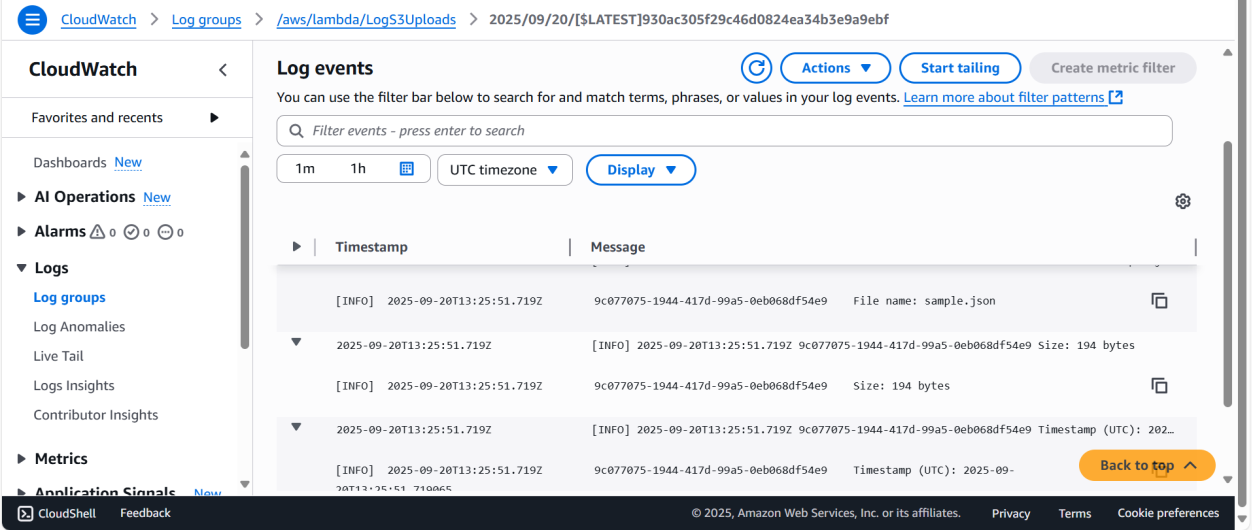

11. Use AWS Glue to crawl your S3 dataset, create a Data Catalog table, and run a Glue job to convert CSV data to parquet. Share job code and output location.

-> 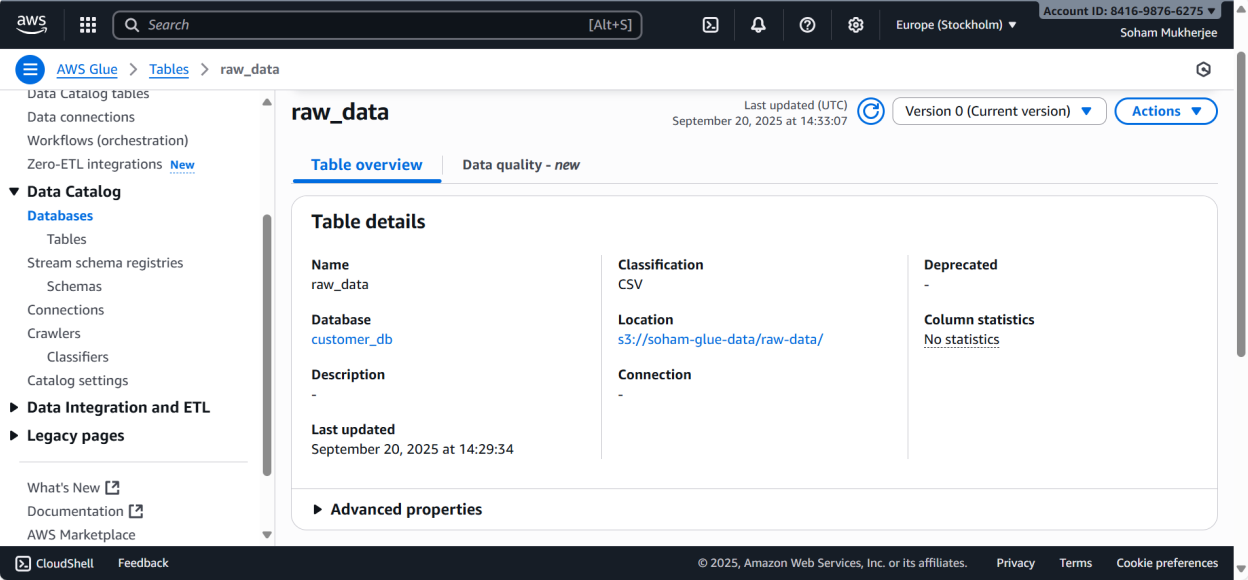

Job (csv_to_parquet)-

import sys

from awsglue.transforms import *

from awsglue.utils import getResolvedOptions

from pyspark.context import SparkContext

from awsglue.context import GlueContext

from awsglue.job import Job


args = getResolvedOptions(sys.argv, ['JOB_NAME'])

sc = SparkContext()

glueContext = GlueContext(sc)

spark = glueContext.spark_session

job = Job(glueContext)

job.init(args['JOB_NAME'], args)


input_path = "s3://soham-glue-data/raw-data/customers.csv"

df = spark.read.option("header", True).csv(input_path)


output_path = "s3://soham-glue-data/processed-data/"

df.write.mode("overwrite").parquet(output_path)

job.commit()

Output Location-

s3://soham-glue-data/processed-data/

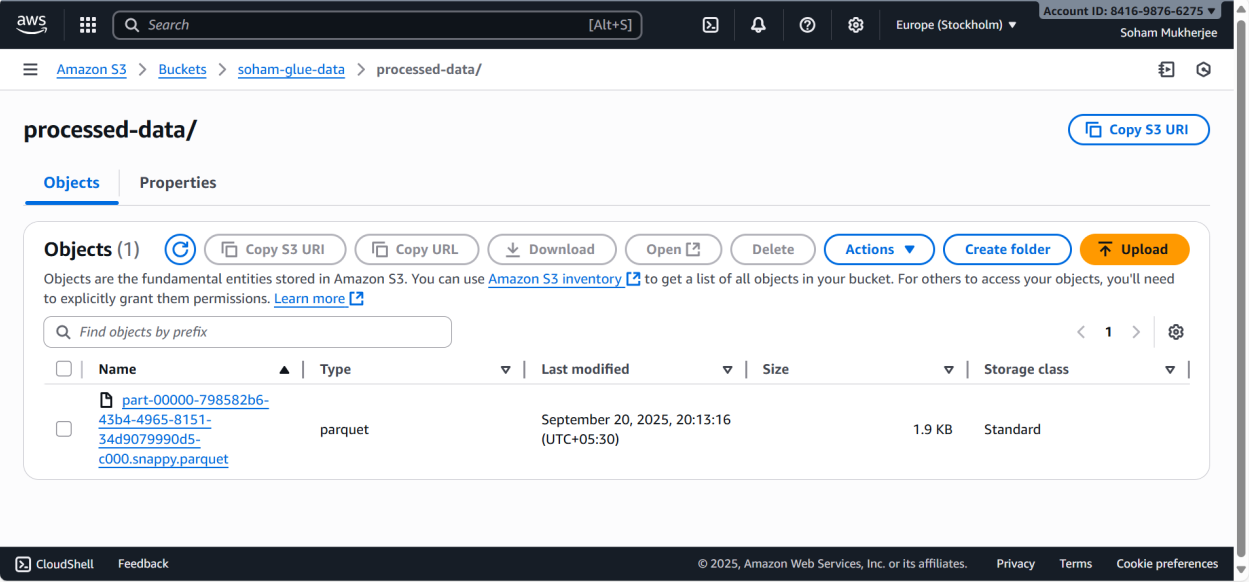

12. Explain the difference between Kinesis Data Streams, Kinesis Firehose, and Kinesis Data Analytics. Provide a real-world example of how each would be used.

-> Amazon Kinesis Data Streams (KDS)-

Definition:

a. A real-time, scalable streaming service that lets you collect and process large volumes of data continuously.

b. Data is stored in shards, and consumers read data from the shards in near real-time.

c. We manage the processing logic ourself (e.g., using Lambda, EC2, or Kinesis Client Library).

Key Points of Amazon Kinesis Data Streams (KDS):

a. Enables real-time custom processing.

b. Data retention: up to 7 days (configurable).

c. We control the number of shards to scale throughput.

Real-World Example:

Stock Trading Platform:

a. Every trade is streamed to Kinesis Data Streams.

b. A consumer app calculates real-time analytics like moving averages and triggers alerts for unusual trading activity.

Amazon Kinesis Data Firehose-

Definition:

a. Fully managed service for loading streaming data into destinations like S3, Redshift, Elasticsearch, or Splunk.

b. Minimal setup—Firehose handles batching, compression, and delivery automatically.

c. Supports transformations with Lambda before delivery.

Key Points of Amazon Kinesis Data Firehose:

a. No need to manage shards or consumers.

b. Best for streaming data to storage/analytics services.

c. Supports near real-time delivery (seconds to minutes).

Real-World Example:

Website Clickstream Analytics:

a. Every click on a website is sent to Kinesis Firehose.

b. Firehose delivers it to S3 for storage and Redshift for analytics dashboards.

Amazon Kinesis Data Analytics (KDA)-

Definition:

a. Fully managed service for real-time data analytics using SQL or Apache Flink on streaming data.

b. Reads from Kinesis Data Streams or Firehose.

c. Outputs can be sent to S3, Redshift, Firehose, or other streaming services.

Key Points of Amazon Kinesis Data Analytics:

a. Enables real-time transformations, aggregations, and analytics without writing full application code.

b. Supports time-windowed operations (like tumbling, sliding, or session windows).

Real-World Example:

IoT Sensor Monitoring:

a. Temperature sensors stream data to Kinesis Data Streams.

b. Kinesis Data Analytics continuously calculates average temperature per device per hour.

c. Alerts are sent to CloudWatch if thresholds are exceeded.

13. What is columnar storage and how does it benefit Redshift performance for analytics workloads?

-> Columnar storage is a method of storing data by columns instead of by rows.

Columnar storage: Stores all values of a column together.

a. Column ID: 1, 2, 3, ...

b. Column Name: Alice, Bob, Charlie, ...

c. Column Age: 25, 30, 28, ...

d. Column Location: NY, London, Paris, ...

Data is organized column-wise on disk rather than row-wise.

Columnar Storage Benefits Redshift by-

a. Efficient Query Performance:

1. Analytical queries often read only a few columns from large tables (e.g., SUM(sales) or AVG(price)).

2. Redshift can read only the required columns instead of scanning entire rows.

3. Result: Much faster query execution for analytics workloads.

b. Better Data Compression:

1. Columnar storage often has similar data types in a column, allowing high compression ratios.

2. Example: A column of ZIP codes can be compressed efficiently.

3. Result: Reduced storage costs and faster I/O.

c. Reduced I/O:

1. Since only necessary columns are read from disk, less data is transferred to compute nodes.

2. Result: Lower latency for queries and less disk usage.

d. Optimized for Aggregations:

1. Aggregation queries (e.g., SUM, COUNT, AVG) run faster because columnar storage allows vectorized processing.

14. Load a CSV file from S3 into Redshift using the COPY command. Share table schema, command used, and sample output from a query.

-> COPY Command:
COPY customer.public.customers FROM 's3://soham-glue-data/raw-data/customers.csv' IAM_ROLE 'arn:aws:iam::841698766275:role/service-role/AmazonRedshift-CommandsAccessRole-20250920T203454' FORMAT AS CSV DELIMITER ',' QUOTE '"' IGNOREHEADER 1 REGION AS 'eu-north-1'

Table(customers) schema: 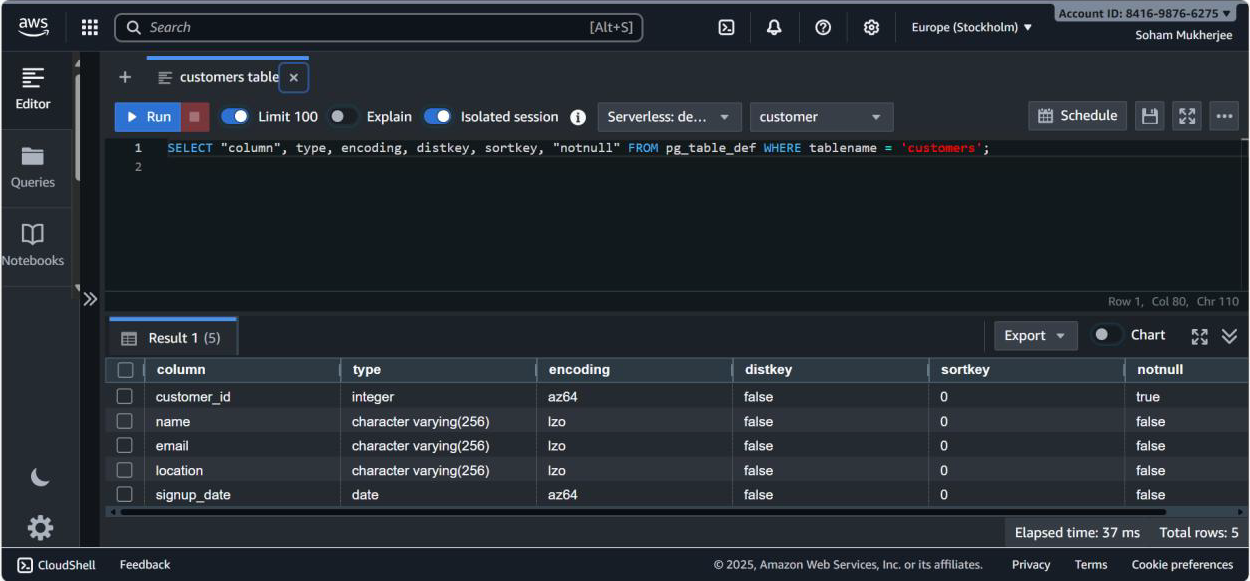

Sample Output from a Query: 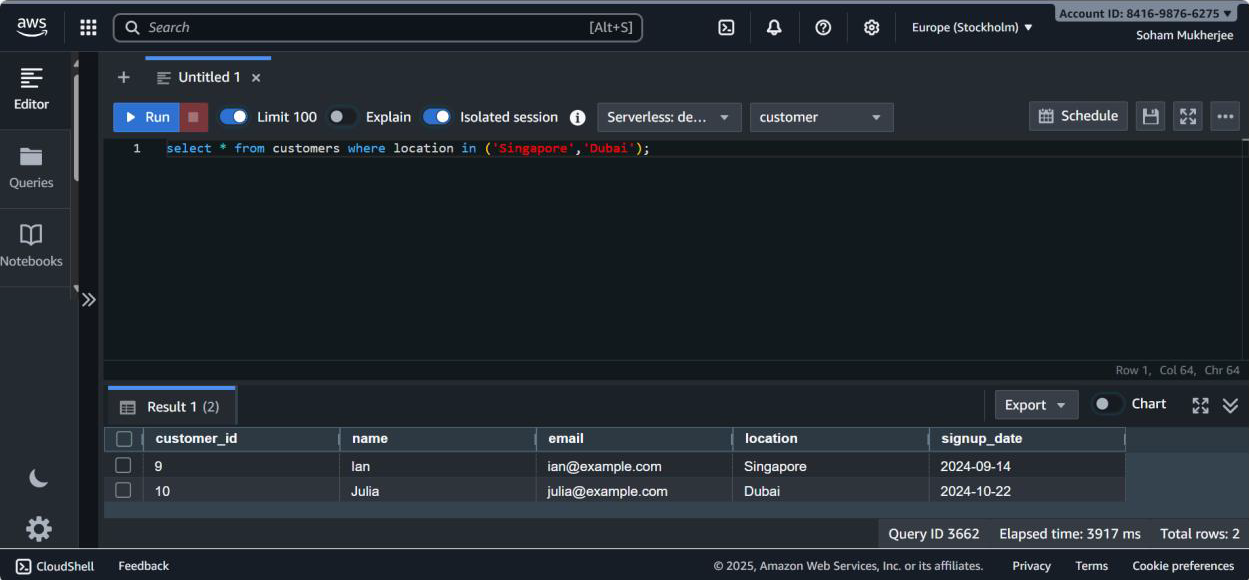

15. What is the role of the AWS Glue Data Catalog in Athena? How does schema-on-read work?

-> AWS Glue Data Catalog is a centralized metadata repository that stores information about our data:

Tables: Name, columns, data types, partitions

Databases: Group of tables

Partitions: Metadata about data slices (e.g., date, region)

Location: Where the actual data lives in S3

In Athena:

a. Athena does not store the data itself, only queries it in S3.

b. Athena relies on the Data Catalog to know the structure (schema) of the data.

c. When we query a table in Athena, it reads the metadata from Glue Data Catalog to understand:

1. Column names and types

2. Partitioning scheme

3. File format (CSV, Parquet, ORC, JSON, etc.)

Example:

If we have s3://your-bucket/sales/2025-09-20/ with Parquet files, Glue Data Catalog tells Athena:

Column          Type

sale_id         INT

product_id      INT

price           FLOAT

sale_date       DATE

Athena then queries the Parquet files without needing to alter the files themselves.

Schema-on-read means:

a. The schema is applied when we read the data, not when we write it.

b. The data itself remains in raw format in S3.

c. We can change the schema in the Data Catalog without modifying the underlying files.

Benefits:

a. Flexible:

We can store raw JSON, CSV, or Parquet files and define different schemas for different queries.

b. Low upfront cost:

No need to transform or load data into a structured database upfront.

c. Easier for analytics pipelines:

Data scientists can explore new datasets without waiting for ETL to enforce schema.

Example:

S3 file:

1,Alice,100

2,Bob,200

Glue schema: id INT, name STRING, score INT -> Athena reads it accordingly.

Later, we can add a column date STRING in Glue without changing the S3 file. Athena will read it as NULL for older rows.

16. Create an Athena table from S3 data using Glue Catalog. Run a query and share the SQL + result screenshot

-> 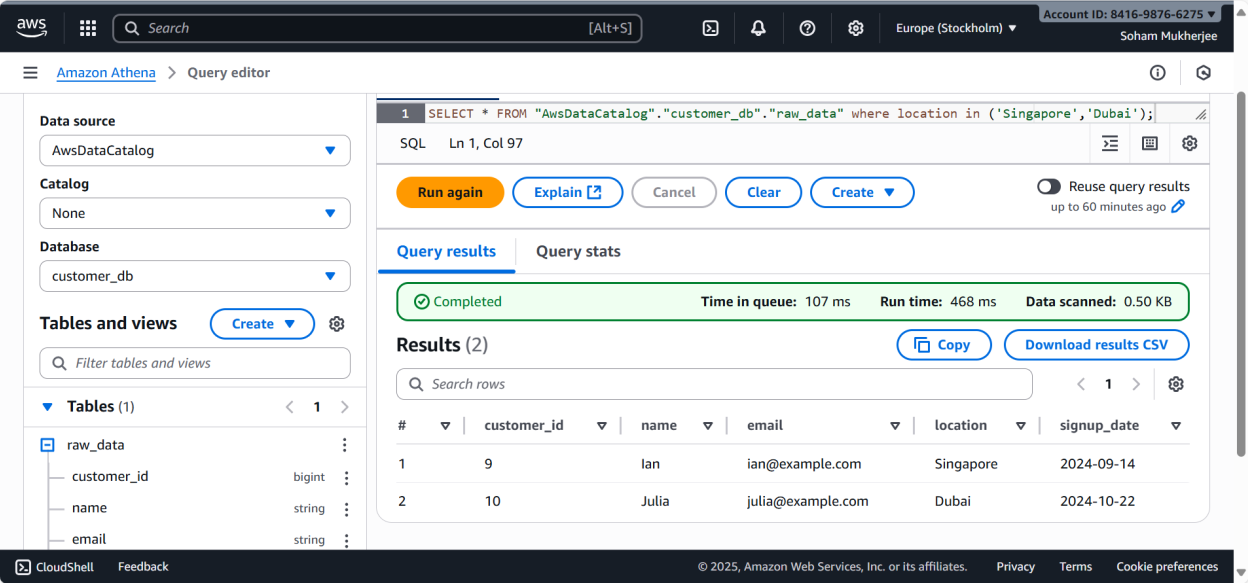

17. Describe how Amazon Quicksight supports business intelligence in a serverless data architecture. What are SPICE and embedded dashboards?

-> Amazon QuickSight is AWS’s serverless BI (Business Intelligence) service.

a. It connects directly to serverless data sources like:

Amazon S3 (via Athena)

Amazon Redshift (serverless or provisioned)

RDS / DynamoDB

Data prepared by AWS Glue

b. No servers to provision, scale, or manage—QuickSight automatically scales to handle concurrent users.

It supports BI in serverless setups by:

a. Ad-hoc analytics: Analysts can run queries on raw S3 data via Athena (schema-on-read).

b. Dashboards & Visualizations: Users get interactive dashboards without setting up separate BI infrastructure.

c. Pay-per-session: Cost-effective since you only pay when users interact with dashboards.

d. Integration: Fits seamlessly with data lakes, data warehouses, and ML services on AWS.

SPICE (Super-fast, Parallel, In-memory Calculation Engine) is QuickSight’s in-memory cache and query acceleration layer.

a. When we import data into QuickSight, SPICE stores it in a highly optimized, columnar, compressed format.

b. Queries against SPICE are fast and don’t need to hit the underlying database every time.

c. Scalable: Can handle millions of rows interactively.

d. Auto-refresh: SPICE datasets can be refreshed periodically from the source (e.g., daily/hourly).

Benefits of SPICE:

a. Faster dashboards (low latency)

b. Reduces load on data sources (e.g., Athena, Redshift)

c. Cost savings (fewer queries run directly against data sources)

Embedded dashboards allow us to integrate QuickSight analytics directly into our own applications, portals, or websites.

a. Using the QuickSight SDK or APIs, you can embed dashboards so that end-users don’t need to log into QuickSight 
separately.

b. Supports row-level security (RLS) → users only see data they are authorized to view.

c. Enables multi-tenant analytics for SaaS providers.

Example:

A retail SaaS platform embeds QuickSight dashboards in its web app so that each store owner sees their sales reports directly in the app, powered by the same QuickSight backend.

18. Connect Quicksight to Athena or Redshift and build a dashboard with at least one calculated field and one filter. Share a screenshot of your final dashboard.

-> 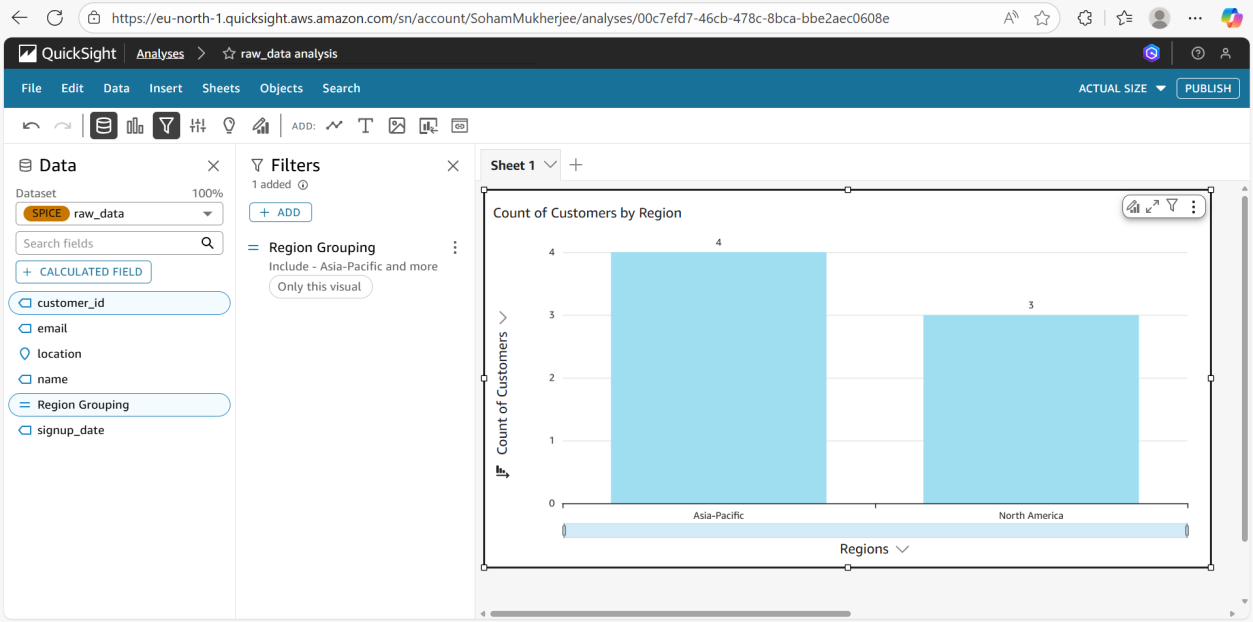

19. Explain how AWS CloudWatch and CloudTrail differ. IN a data analytics pipeline, what role does each play in monitoring, auditing, and troubleshooting?

-> AWS CloudWatch-

a. Purpose: Monitoring and observability.

1. What it does: Collects and visualizes metrics, logs, and events from AWS resources and applications.

2. Data types: CPU, memory, disk usage, API request latency, Lambda invocation counts, S3 event notifications, etc.

3. Key features:

CloudWatch Alarms → trigger notifications or actions when metrics cross thresholds.

CloudWatch Logs → store and analyze application or service logs.

CloudWatch Dashboards → visualize performance metrics across services.

b. Role in a Data Analytics Pipeline:

1. Monitoring: Tracks health and performance of data pipelines (Lambda, Glue jobs, Redshift clusters, Kinesis streams).

2. Troubleshooting: Helps detect bottlenecks (e.g., Glue job running slowly, Lambda errors, Redshift query lag).

3. Alerts: Notifies teams if S3 data ingestion fails or Kinesis processing lags.

Example:

If a Glue ETL job fails while converting CSV → Parquet, CloudWatch Logs show the error stack trace, helping fix the issue quickly.

AWS CloudTrail

a. Purpose: Governance, auditing, and compliance.

1. What it does: Records API calls and user activity across AWS services.

2. Data types: Who did what, when, and from where — including AWS Management Console, SDK, CLI, and other services.

3. Key features:

Maintains a history of AWS API calls.

Helps with security auditing and compliance reporting.

Can trigger alerts on unauthorized or unusual activity using CloudWatch Events.

b. Role in a Data Analytics Pipeline:

1. Auditing: Tracks who uploaded data to S3, who modified Glue crawlers or Redshift tables.

2. Security Monitoring: Detects unauthorized access or privilege escalation in pipeline resources.

3. Troubleshooting Root Cause: When an ETL job fails due to a permissions issue, CloudTrail shows which IAM role/user tried to perform the action.

Example:
Someone accidentally deletes an S3 file used in the analytics pipeline -> CloudTrail logs show who deleted the object and when.

20. Describe a complete end-to-end data analytics pipeline using AWS services. Include services for data ingestion, storage, transformation, querying, and visualization. (Example: S3 → Lambda → Glue → Quicksight) Explain why you would choose each service for the stage it’s used in.

-> A detailed end-to-end AWS data analytics pipeline, broken down stage by stage, including service choices and rationale:

a. Data Ingestion-

1. Service: Amazon S3 + AWS Lambda

S3: Primary storage for raw data (CSV, JSON, logs, IoT streams).

Lambda: Serverless compute for preprocessing, validating, or routing data as it arrives.

2. Why:

a. S3 is highly durable, scalable, and cost-effective for raw data.

b. Lambda allows automatic processing on upload without provisioning servers, enabling event-driven ingestion.

Example:

a. Users upload CSV sales data to s3://raw-data/.

b. Lambda triggers on object creation -> validates the file format and writes metadata to a DynamoDB table.

b. Data Storage-

1. Service: Amazon S3 (raw + processed), Amazon Redshift (analytics), or DynamoDB (for fast lookup)

S3: Stores both raw and transformed datasets (data lake).

Redshift: Columnar storage for structured, query-intensive analytics.

DynamoDB: Optional for high-speed lookups or real-time dashboards.

2. Why:

a. S3 enables cost-effective, schema-on-read storage.

b. Redshift is optimized for large-scale analytics with fast queries.

c. DynamoDB is excellent for key-value lookups in operational dashboards.


c. Data Transformation / ETL-

1. Service: AWS Glue

Glue Crawler: Automatically discovers schema of data in S3 and creates Data Catalog tables.

Glue ETL Jobs: Transform data from raw to optimized formats (e.g., CSV -> Parquet, JSON -> Parquet).

2. Why:

a. Serverless ETL (no cluster management).

b. Optimizes data for analytics (columnar storage, partitioning).

c. Integrates directly with Athena, Redshift, and S3.

Example:
Transform raw CSV sales data -> partition by month -> store as Parquet in S3 for fast queries.

d. Querying / Analytics

1. Services: Amazon Athena, Amazon Redshift, Amazon Kinesis (optional real-time)

Athena: Serverless interactive queries on S3 data (schema-on-read).

Redshift: For complex analytics and dashboards requiring joins, aggregations, or BI reports.

Kinesis: For real-time streaming analytics (optional).

2. Why:

a. Athena allows fast queries on raw/processed S3 data without ETL for ad-hoc analysis.

b. Redshift handles high-performance analytical queries at scale.

c. Kinesis enables near-real-time insights from streaming sources.

Example:

a. Analysts run queries on sales trends by month or region in Athena.

b. Redshift stores aggregated KPIs for dashboards.

e. Visualization / BI-

1. Service: Amazon QuickSight

Connects to S3 (via Athena), Redshift, and DynamoDB.

Provides dashboards, charts, and SPICE in-memory acceleration for fast performance.

Supports embedding dashboards in applications.

2. Why:

a. QuickSight is serverless -> no infrastructure management.

b. Fast visualizations for both small and large datasets.

c. Enables interactive dashboards for business users.

Example:

a. Dashboard shows sales trends, top customers, and regional performance.

b. Alerts if data anomalies are detected.

f. Monitoring & Auditing-

1. Services: CloudWatch + CloudTrail

CloudWatch: Monitor Glue job durations, Lambda errors, Redshift query performance.

CloudTrail: Auditing data access, who modified tables, or uploaded files to S3.

2. Why:

a. Ensures reliability, performance tracking, and compliance.